# CSE 252B: Computer Vision II, Winter 2022 – Assignment 5
### Instructor: Ben Ochoa
### Due: Wednesday, March 16, 2022, 11:59 PM

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* This assignment contains both math and programming problems.
* All solutions must be written in this notebook
* Math problems must be done in Markdown/LATEX.
* You must show your work and describe your solution.
* Programming aspects of this assignment must be completed using Python in this notebook.
* Your code should be well written with sufficient comments to understand, but there is no need to write extra markdown to describe your solution if it is not explictly asked for.
* This notebook contains skeleton code, which should not be modified (This is important for standardization to facilate effecient grading).
* You may use python packages for basic linear algebra, but you may not use packages that directly solve the problem. If you are uncertain about using a specific package, then please ask the instructional staff whether or not it is allowable.
* You must submit this notebook exported as a pdf. You must also submit this notebook as an .ipynb file.
* Your code and results should remain inline in the pdf (Do not move your code to an appendix).
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* It is highly recommended that you begin working on this assignment early.

## Problem 1 (Math): Point on Line Closest to the Origin (5 points)
  Given a line $\boldsymbol{l} = (a, b, c)^\top$, show that the point on
  $\boldsymbol{l}$ that is closest to the origin is the point $\boldsymbol{x} =
  (-ac, -bc, a^2+b^2)^\top$ (Hint: this calculation is needed in the
  two-view optimal triangulation method used below).

"""Write your solution here."""


Given the equation $\boldsymbol{{l}^\top x} = 0$,
 where $\boldsymbol{l} = (a, b, c)^\top$ and x is a homogeneous coordinate $\boldsymbol{X} = (x, y, 1)^\top$, we can represents the relation with: 
$ax + by + c = 0 $. Then we can note y with x as $y = \frac {-(ax + c)}{b}$. A line $ l^{'}$ orthogonal to $ l^{}$ and passing through the origin is $ bx -ay = 0 $. We can use this equation to solve x, y with notations of a, b, c, where $ x = \frac {-ac}{a^2 + b^2}$, and $ y = \frac {-bc}{a^2 + b^2}$. Bring these two terms into $\boldsymbol{X} = (x, y, 1)^\top$, then we cen get:  $\boldsymbol{x} = (\frac{-ac}{a^2 + b^2}, \frac{-bc}{a^2 + b^2}, 1)^\top$, which is equivalent to $\boldsymbol{x} =
  (-ac, -bc, a^2+b^2)^\top$ in homogeneous coordinate system.


## Problem 2 (Programming): Feature Detection (20 points)
Download input data from the course website. The file IMG_5030.jpeg
contains image 1 and the file IMG_5031.jpeg contains image 2. 

For each input image, calculate an image where each pixel value is the minor
eigenvalue of the gradient matrix

$N=\left[ \begin{array}{cc}
\sum\limits_w I_x^2 & \sum\limits_w I_x I_y\\
\sum\limits_w I_x I_y & \sum\limits_w I_y^2
\end{array} \right]$

where w is the window about the pixel, and $I_x$ and $I_y$ are the gradient images in
the x and y direction, respectively. Calculate the gradient images using the fivepoint
central difference operator. Set resulting values that are below a specified
threshold value to zero (hint: calculating the mean instead of the sum in N allows
for adjusting the size of the window without changing the threshold value). Apply
an operation that suppresses (sets to 0) local (i.e., about a window) nonmaximum
pixel values in the minor eigenvalue image. Vary these parameters such that
1350–1400 features are detected in each image. For resulting nonzero pixel
values, determine the subpixel feature coordinate using the Forstner corner point
operator.

#### Report your final values for:
 * the size of the feature detection window (i.e. the size of the window used to calculate the elements in the gradient matrix N)
 * the minor eigenvalue threshold value 
 * the size of the local nonmaximum suppression window 
 * the resulting number of features detected (i.e. corners) in each image.

#### Display figures for:
 * original images with detected features, where the detected features are indicated by a square window (the size of the detection window) about the features
 
A typical implementation takes around <strong>30</strong> seconds. If yours takes more than <strong>60</strong>, you may lose points.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.signal import convolve2d as conv2d
import scipy.ndimage

def ImageGradient(I):
    # inputs: 
    # I is the input image (may be mxn for Grayscale or mxnx3 for RGB)
    #
    # outputs:
    # Ix is the derivative of the magnitude of the image w.r.t. x
    # Iy is the derivative of the magnitude of the image w.r.t. y
    
    m, n = I.shape[:2]
    
    """your code here"""
    Ix = np.zeros([m, n])
    Iy = np.zeros([m, n])

    r, g, b = I[:,:,0], I[:,:,1], I[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    kernel_X = 1/12*np.array([-1, 8, 0, -8, 1])
    Ix_pad = np.pad(gray, [(0, 0), (2, 2)], 'symmetric')
    for i in range(m) :
        Ix[i, :] = np.convolve(Ix_pad[i], kernel_X, 'valid')

    kernel_Y = kernel_X.T
    Iy_pad = np.pad(gray, [(2, 2), (0, 0)], 'symmetric')
    for i in range(n) :
        Iy[:, i] = np.convolve(Iy_pad[:, i], kernel_Y, 'valid')
        
    return Ix, Iy
  

def MinorEigenvalueImage(Ix, Iy, w):
    # Calculate the minor eigenvalue image J
    #
    # inputs:
    # Ix is the derivative of the magnitude of the image w.r.t. x
    # Iy is the derivative of the magnitude of the image w.r.t. y
    # w is the size of the window used to compute the gradient matrix N
    #
    # outputs:
    # J0 is the mxn minor eigenvalue image of N before thresholding

    m, n = Ix.shape[:2]
    J0 = np.zeros((m,n))

    #Calculate your minor eigenvalue image J0.
    """your code here"""
    Ix_sq = Ix**2
    Iy_sq = Iy**2
    Ixy = Ix*Iy
    
    b1 = np.zeros((m,n))
    b2 = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            b1[i][j] = j * Ix_sq[i][j] + i * Ixy[i][j]
            b2[i][j] = j * Ixy[i][j] + i * Iy_sq[i][j]
    
    #Calculate your minor eigenvalue image J0.
    """your code here"""
    win = int(w/2) 
    N = np.zeros((m,n,2,2))
    B = np.zeros((m,n,2,1))

    for i in range(win, m - win):
        for j in range(win, n - win):
            spatialM = np.zeros((2,2))
            spatialM[0,0] = np.sum(Ix_sq[i - win : i + win + 1, j - win : j + win + 1]) 
            spatialM[1,1] = np.sum(Iy_sq[i - win : i + win + 1, j - win : j + win + 1]) 
            spatialM[0,1] = np.sum(Ixy[i - win : i + win + 1, j - win : j + win + 1])
            spatialM[1,0] = np.sum(Ixy[i - win : i + win + 1, j - win : j + win + 1])
             
            N[i,j,:,:] = spatialM
            B[i, j, 0, 0] = np.sum(b1[i - win : i + win + 1, j - win : j + win + 1]) 
            B[i, j, 1, 0] = np.sum(b2[i - win : i + win + 1, j - win : j + win + 1]) 
            trace = np.matrix.trace(spatialM)
            lam = (trace - np.sqrt(trace**2 - 4*np.linalg.det(spatialM)))/2
            J0[i,j] = lam
    return J0, N, B
  
def NMS(J, w_nms):
    # Apply nonmaximum supression to J using window w_nms
    #
    # inputs: 
    # J is the minor eigenvalue image input image after thresholding
    # w_nms is the size of the local nonmaximum suppression window
    # 
    # outputs:
    # J2 is the mxn resulting image after applying nonmaximum suppression
    # 
    
    J2 = J.copy()
    """your code here"""
    J_buff = np.zeros(J2.shape)
    win = (w_nms - 1) // 2
    for i in range(win, J.shape[0]):
        for j in range(win, J.shape[1]):
            J_buff[i, j] = np.max(J2[i - win : i + win + 1, j - win : j + win + 1])
    
    for i in range(win, J.shape[0]):
        for j in range(win, J.shape[1]):
            if J[i, j] < J_buff[i, j]:
                J2[i, j] = 0
            else:
                J2[i, j] = J_buff[i, j]
    
    return J2
  
  
def ForstnerCornerDetector(Ix, Iy, w, t, w_nms):
    # Calculate the minor eigenvalue image J
    # Threshold J
    # Run non-maxima suppression on the thresholded J
    # Gather the coordinates of the nonzero pixels in J 
    # Then compute the sub pixel location of each point using the Forstner operator
    #
    # inputs:
    # Ix is the derivative of the magnitude of the image w.r.t. x
    # Iy is the derivative of the magnitude of the image w.r.t. y
    # w is the size of the window used to compute the gradient matrix N
    # t is the minor eigenvalue threshold
    # w_nms is the size of the local nonmaximum suppression window
    #
    # outputs:
    # C is the number of corners detected in each image
    # pts is the 2xC array of coordinates of subpixel accurate corners
    #     found using the Forstner corner detector
    # J0 is the mxn minor eigenvalue image of N before thresholding
    # J1 is the mxn minor eigenvalue image of N after thresholding
    # J2 is the mxn minor eigenvalue image of N after thresholding and NMS

    m, n = Ix.shape[:2]
    J0 = np.zeros((m,n))
    J1 = np.zeros((m,n))

    #Calculate your minor eigenvalue image J0 and its thresholded version J1.
    """your code here"""
    J2 = NMS(J1, w_nms)
    J0, N, B = MinorEigenvalueImage(Ix, Iy, w)
    J1 = J0.copy()
    J1[J1<t] = 0
    #Run non-maxima suppression on your thresholded minor eigenvalue image.
    J2 = NMS(J1, w_nms)
    #Detect corners.
    """your code here"""

    b1 = np.zeros((m,n))
    b2 = np.zeros((m,n))
    C = 0
    corners = []
    for i in range(m):
        for j in range(n):
            if J2[i,j] > 0:
                C += 1
                corner = np.dot(np.linalg.inv(N[i,j,:,:]), B[i,j,:,:])
                corners.append(corner)
    n = len(corners)
    pts = np.zeros((2, n))
    for i in range(n):
        pts[1,i] = corners[i][0]
        pts[0,i] = corners[i][1]
    pts[[0,1]] = pts[[1,0]]
    
    
    return C, pts, J0, J1, J2


# feature detection
def RunFeatureDetection(I, w, t, w_nms):
    Ix, Iy = ImageGradient(I)
    C, pts, J0, J1, J2 = ForstnerCornerDetector(Ix, Iy, w, t, w_nms)
    return C, pts, J0, J1, J2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in sqrt


took 98.344860 secs


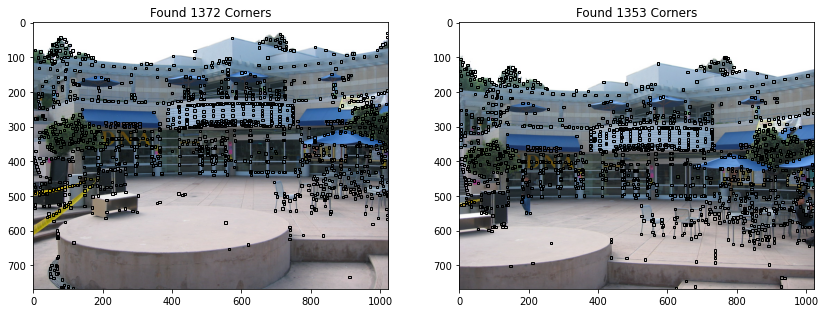

In [ ]:
from PIL import Image
import time

# input images
I1 = np.array(Image.open('IMG_5030.JPG'), dtype='float')/255.
I2 = np.array(Image.open('IMG_5031.JPG'), dtype='float')/255.

# parameters to tune
w = 7
t = 0.053
w_nms = 7

tic = time.time()

# run feature detection algorithm on input images
C1, pts1, J1_0, J1_1, J1_2 = RunFeatureDetection(I1, w, t, w_nms)
C2, pts2, J2_0, J2_1, J2_2 = RunFeatureDetection(I2, w, t, w_nms)
toc = time.time() - tic

print('took %f secs'%toc)

# display results
plt.figure(figsize=(14,24))

# show corners on original images
ax = plt.subplot(1,2,1)
plt.imshow(I1)
for i in range(C1): # draw rectangles of size w around corners
    x,y = pts1[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
# plt.plot(pts1[0,:], pts1[1,:], '.b') # display subpixel corners
plt.title('Found %d Corners'%C1)

ax = plt.subplot(1,2,2)
plt.imshow(I2)
for i in range(C2):
    x,y = pts2[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
# plt.plot(pts2[0,:], pts2[1,:], '.b')
plt.title('Found %d Corners'%C2)

plt.show()

#### Final values for parameters
* w = 7
* t = 0.053
* w_nms = 7
* C1 = 1372
* C2 = 1353

## Problem 3 (Programming): Feature matching (15 points)
Determine the set of one-to-one putative feature correspondences by performing
a brute-force search for the greatest correlation coefficient value (in the range
[-1, 1]) between the detected features in image 1 and the detected features in
image 2. Only allow matches that are above a specified correlation coefficient
threshold value (note that calculating the correlation coefficient allows for adjusting
the size of the matching window without changing the threshold value).
Further, only allow matches that are above a specified distance ratio threshold
value, where distance is measured to the next best match for a given feature.
Vary these parameters such that <strong>225-275</strong> putative feature correspondences are
established. Optional: constrain the search to coordinates in image 2 that are
within a proximity of the detected feature coordinates in image 1.

**Note: You must center each window at the sub-pixel corner
coordinates while computing normalized cross correlation; otherwise, you
will lose points.**

#### Report your final values for:
* the size of the matching window
* the correlation coefficient threshold
* the distance ratio threshold 
* the size of the proximity window (if used)
* the resulting number of putative feature correspondences (i.e. matched features)

#### Display figures for:
* pair of images, where the matched features are indicated by a square window (the size of the matching window) about the feature and a line segment is drawn from the feature to the coordinates of the corresponding feature in the other image

A typical implementation takes around <strong>40</strong> seconds. If yours takes more than <strong>80</strong> seconds, you may lose points.

In [ ]:
import numpy.ma as ma
def NCC(I1, I2, pts1, pts2, w, p):
    # compute the normalized cross correlation between image patches I1, I2
    # result should be in the range [-1,1]
    #    
    # Do ensure that windows are centered at the sub-pixel co-ordinates 
    #      while computing normalized cross correlation.
    #
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the matching window to compute correlation coefficients
    # p is the size of the proximity window
    #
    # output:
    # normalized cross correlation matrix of scores between all windows in 
    #    image 1 and all windows in image 2
    
    """your code here"""
    size1 = pts1.shape[1]
    size2 = pts2.shape[1]

    scores = np.zeros((size1, size2)) 
    R = int(w/ 2)
    
    pts1 = pts1.astype(int)
    pts2 = pts2.astype(int)
    h1, w1 = I1.shape[0], I1.shape[1]
    h2, w2 = I2.shape[0], I2.shape[1]
    
    
    for i in range(size1):
        pt1_y = pts1[1, i]
        pt1_x = pts1[0, i]
        if pt1_y < R or pt1_y >= h1 - R or pt1_x < R or pt1_x >= w1 - R:
            continue
        for j in range(size2):
            pt2_y = pts2[1, j]
            pt2_x = pts2[0, j]
            if pt2_y < R or pt2_y >= h2 - R or pt2_x < R or pt2_x >= w2 - R:
                continue

            if np.abs(pts1[1, i] - pts2[1, j]) > p or np.abs(pts1[0, i] - pts2[0, j]) > p:
                scores[i, j] = -1
                continue
            window1 = I1[pt1_y - R : pt1_y + R + 1, pt1_x - R : pt1_x + R + 1]
            window2 = I2[pt2_y - R : pt2_y + R + 1, pt2_x - R : pt2_x + R + 1]
            mean1 = np.mean(window1)
            mean2 = np.mean(window2)   
            sq1 = np.sum((window1 - mean1) ** 2)
            sq2 = np.sum((window2 - mean2) ** 2)
            score = np.sum((window1 - mean1) * (window2 - mean2))
            scores[i, j] = (score / np.sqrt(sq1 * sq2))

    return scores

    

def Match(scores, t, d):
    # perform the one-to-one correspondence matching on the correlation coefficient matrix
    # 
    # inputs:
    # scores is the NCC matrix
    # t is the correlation coefficient threshold
    # d distance ration threshold
    #
    # output:
    # 2xM array of the feature coordinates in image 1 and image 2,
    # where M is the number of matches.
    
    """your code here"""
    inds = []
    m,n = scores.shape
    best_score = np.max(scores)
    mask = np.ones((m,n), dtype = bool)
    i,j = np.unravel_index(np.argmax(scores * mask, axis=None), scores.shape)
    
    while best_score > t:
        scores[i][j] = -1
        row = np.max(scores[i,:])
        col = np.max(scores[:,j])
        next_best_score = max(row,col)
        scores[i][j] = best_score
        if (1 - best_score) < (1 - next_best_score) * d:
            inds.append((i,j))
        for i_ in range(m):
            mask[i_,j] = False
        for j_ in range(n):
            mask[i,j_] = False

        best_score = np.max(scores * mask)
        i,j = np.unravel_index(np.argmax(scores * mask, axis=None), scores.shape)
    inds = np.array(inds).T
        
    return inds


def RunFeatureMatching(I1, I2, pts1, pts2, w, t, d, p):
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the matching window to compute correlation coefficients
    # t is the correlation coefficient threshold
    # d distance ration threshold
    # p is the size of the proximity window
    #
    # outputs:
    # inds is a 2xk matrix of matches where inds[0,i] indexs a point pts1 
    #     and inds[1,i] indexs a point in pts2, where k is the number of matches
    
    scores = NCC(I1, I2, pts1, pts2, w, p)
    inds = Match(scores, t, d)
    return inds

took 42.116134 secs


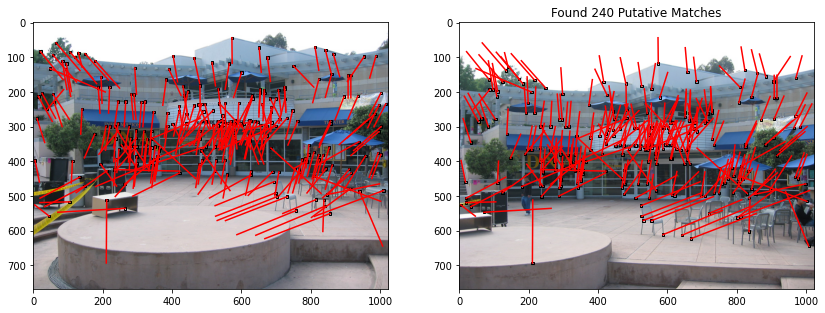

unique points in image 1: 240
unique points in image 2: 240


In [ ]:
# parameters to tune
w = 7
t = 0.80
d = 0.78
p = 200

tic = time.time()


# run the feature matching algorithm on the input images and detected features
inds = RunFeatureMatching(I1, I2, pts1, pts2, w, t, d, p)
toc = time.time() - tic

print('took %f secs'%toc)
# create new matrices of points which contain only the matched features 
match1 = pts1[:,inds[0,:].astype('int')]
match2 = pts2[:,inds[1,:].astype('int')]

# # display the results
plt.figure(figsize=(14,24))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)
plt.title('Found %d Putative Matches'%match1.shape[1])
for i in range(match1.shape[1]):
    x1,y1 = match1[:,i]
    x2,y2 = match2[:,i]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w/2,y2-w/2),w,w, fill=False))

plt.show()

print('unique points in image 1: %d'%np.unique(inds[0,:]).shape[0])
print('unique points in image 2: %d'%np.unique(inds[1,:]).shape[0])

#### Final values for parameters
* w = 7
* t = 0.80
* d = 0.78
* p = 200
* num_matches = 240

## Problem 4 (Programming): Outlier Rejection (20 points)
  
  The resulting set of putative point correspondences should contain both inlier
and outlier correspondences (i.e., false matches). Determine the set of inlier point
correspondences using the M-estimator Sample Consensus (MSAC) algorithm,
where the maximum number of attempts to find a consensus set is determined
adaptively. For each trial, you must use the 7-point algorithm (as described in
lecture) to estimate the fundamental matrix, resulting in 1 or 3 solutions. Calculate 
the (squared) Sampson error as a first order approximation to the geometric error.

Hint: this problem has codimension 1

Also: fix a random seed in your MSAC. If I cannot reproduce your results, you will lose points. But don't try to find a good seed as I will run your code using different seeds. Try to get 170-220 inliers every time you run MSAC.

#### Report your values for:
 * the probability $p$ that as least one of the random samples does not contain any outliers
 * the probability $\alpha$ that a given point is an inlier
 * the resulting number of inliers
 * the number of attempts to find the consensus set
 * the tolerance for inliers
 * the cost threshold
 * random seed
 
#### Display figures for:
* pair of images, where the inlier features in each of the images are indicated by a square window about the feature and a line segment is drawn from the feature to the coordinates of the corresponding feature in the other image

took 24.792861 secs
33 iterations
inlier count:  185
inliers:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 19, 20, 21, 23, 24, 26, 27, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 47, 49, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 121, 123, 124, 125, 126, 127, 128, 130, 132, 134, 135, 136, 138, 139, 140, 141, 142, 145, 146, 148, 150, 151, 154, 155, 156, 157, 158, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 176, 177, 178, 179, 181, 184, 185, 186, 187, 189, 191, 194, 195, 197, 199, 201, 202, 203, 204, 205, 206, 207, 209, 212, 213, 214, 216, 217, 218, 219, 220, 225, 226, 228, 229, 230, 232, 233, 234, 235, 237, 238, 239]
MSAC Cost = 425.581635133
F_MSAC =
[[ 9.02663337e-09 -7.12079826e-08 -6.56748495e-05]
 [ 1.17558411e-06 -

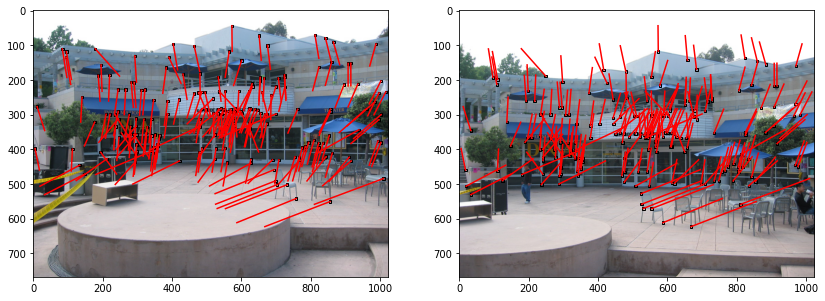

In [ ]:
from scipy.stats import chi2
from sympy import *
from sympy.abc import alpha

def DisplayResults(F, title):
    print(title+' =')
    print(F/np.linalg.norm(F)*np.sign(F[-1,-1]))

def Homogenize(x):
    # converts points from inhomogeneous to homogeneous coordinates
    return np.vstack((x,np.ones((1,x.shape[1]))))


def Dehomogenize(x):
    # converts points from homogeneous to inhomogeneous coordinates
    return x[:-1]/x[-1]

def Normalize(pts):

    T = np.eye(pts.shape[0]+1)
    #for 2D points
    if pts.shape[0] == 2:
        mean_2D = np.mean(pts, axis = 1)
        var_2D = np.var(pts, axis = 1)
        var = np.sum(var_2D)
        s = np.sqrt(2/var)
        #assign values to the elements in T
        T[0,2] = (-1) * mean_2D[0] * s
        T[1,2] = (-1) * mean_2D[1] * s
        T[0,0] = s
        T[1,1] = s

    #for 3D points
    elif pts.shape[0] == 3:
        mean_3D= np.mean(pts, axis = 1)
        var_3D= np.var(pts, axis = 1)
        var = np.sum(var_3D)
        s = np.sqrt(3/var)
        #assign values to the elements in T
        T[0,3] = (-1) * mean_3D[0] * s
        T[1,3] = (-1) * mean_3D[1] * s
        T[2,3] = (-1) * mean_3D[2] * s
        T[0,0] = s
        T[1,1] = s
        T[2,2] = s

    pts = np.dot(T, Homogenize(pts))

    return pts, T


def sampsonError(x1, x2, F):
    error = []
    for i in range(0, x1.shape[1]):
        xi, xi_p = x1[:, i].reshape((-1, 1)), x2[:, i].reshape((-1, 1))
        t1 = (xi_p.T @ F @ xi)** 2
        t2 = (xi_p.T @ F[:, 0])** 2 + (xi_p.T @ F[:, 1])** 2 + (F[0, :] @ xi)** 2 + (F[1, :] @ xi)** 2
        error.append((t1 / t2).flatten())
    error = np.asarray(error).flatten()
    return error

def MSAC(pts1, pts2, thresh, tol, p):
    # Inputs:
    #    pts1 - matched feature correspondences in image 1
    #    pts2 - matched feature correspondences in image 2
    #    thresh - cost threshold
    #    tol - reprojection error tolerance 
    #    p - probability that as least one of the random samples does not contain any outliers   
    #
    # Output:
    #    consensus_min_cost - final cost from MSAC
    #    consensus_min_cost_model - fundamental matrix F
    #    inliers - list of indices of the inliers corresponding to input data
    #    trials - number of attempts taken to find consensus set    

    pts1_homo, pts2_homo = Homogenize(pts1), Homogenize(pts2)
    
    trials = 0
    max_trials = np.inf
    consensus_min_cost = np.inf
    consensus_min_cost_model = np.zeros((3,3))
    inliers = []
    n = pts1.shape[1]
    
    while trials < max_trials and consensus_min_cost > thresh:
        idx = np.random.choice(pts1.shape[1], 7, replace = False)
        pts1_sampled = pts1[:, idx]
        pts2_sampled = pts2[:, idx]
        pts1_sampled, T_1 = Normalize(pts1_sampled)
        pts2_sampled, T_2 = Normalize(pts2_sampled)
        #seven point algorithm
        A = np.kron(pts2_sampled[:, 0].T, pts1_sampled[:, 0].T).reshape((1, -1))
        for i in range(1, 7):
            A = np.vstack((A, np.kron(pts2_sampled[:, i].T, pts1_sampled[:, i].T).reshape(1, -1)))
        u, s, vt = np.linalg.svd(A)
        a = vt[8:9, :]
        b = vt[7:8, :]
        F1 = np.reshape(a, (3, 3))
        F2 = np.reshape(b, (3, 3))

        alpha = Symbol("alhpa")
        roots = solve((alpha * Matrix(F1) + Matrix(F2)).det(), alpha, cubics=False)
        roots = np.fromiter(roots, dtype=complex)

        F_list = []
        error = []
        for i in range(roots.shape[0]):
            if np.isreal(roots[i]):
                alpha = np.real(roots[i])
                fc = alpha * F1 + F2
                F_list.append(fc)
        for i in range(len(F_list)):
            F_list[i] = T_2.T @ F_list[i] @ T_1
            se = sampsonError(pts1_homo, pts2_homo, F_list[i])
            error.append(se)
        
        consensus_cost = np.inf
        for i in range(len(error)):
            cost = 0
            count = 0
            for k in range(error[i].shape[0]):
                if error[i][k] > tol:
                    cost += tol
                else:
                    cost += error[i][k]
                    count += 1
            if cost < consensus_cost:
                consensus_cost = cost
                inlier_count = count
                F = F_list[i]
        #find the best model
        if consensus_cost < consensus_min_cost:
            consensus_min_cost = consensus_cost
            consensus_min_cost_model = F
            w = inlier_count / n
            max_trials = np.log(1 - p) / np.log(1 - w ** 7)
        
        trials += 1
        
    error = sampsonError(pts1_homo, pts2_homo, consensus_min_cost_model)
    for i in range(n):
        if error[i] <= tol:
            inliers.append(i)
            
    return consensus_min_cost, consensus_min_cost_model, inliers, trials



# MSAC parameters 
thresh = 450
alpha = 0.95
variance = 1
tol = chi2.ppf(alpha, df = 2) * variance
p = 0.99

tic=time.time()
np.random.seed(123)
cost_MSAC, F_MSAC, inliers, trials = MSAC(match1, match2, thresh, tol, p)

# choose just the inliers
xin1 = match1[:,inliers]
xin2 = match2[:,inliers]

toc=time.time()
time_total=toc-tic

# display the results
print('took %f secs'%time_total)
print('%d iterations'%trials)
print('inlier count: ',len(inliers))
print('inliers: ',inliers)
print('MSAC Cost = %.9f'%cost_MSAC)
DisplayResults(F_MSAC, 'F_MSAC')
print("tol:{}".format(tol))

# display the figures
plt.figure(figsize=(14,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)

for i in range(xin1.shape[1]):
    x1,y1 = xin1[:,i]
    x2,y2 = xin2[:,i]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w/2,y2-w/2),w,w, fill=False))

plt.show()

#### Final values for parameters
* random seed = 123
* $p$ = 0.99
* $\alpha$ = 0.95
* tolerance = 5.99
* threshold = 450
* num_inliers = 185
* num_attempts = 33
* consensus_min_cost = 425.58

## Problem 5 (Programming): Linear Estimation of the Fundamental Matrix (15 points)
  Estimate the fundamental matrix $\boldsymbol{F}_\text{DLT}$ from the
  resulting set of inlier correspondences using the direct linear
  transformation (DLT) algorithm (with data normalization).  Include
  the numerical values of the resulting $\boldsymbol{F}_\text{DLT}$, scaled
  such that $||\boldsymbol{F}_\text{DLT}||_\text{Fro} = 1$

In [ ]:
def Homogenize(x):
    # converts points from inhomogeneous to homogeneous coordinates    
    return np.vstack((x,np.ones((1,x.shape[1]))))

def Dehomogenize(x):
    # converts points from homogeneous to inhomogeneous coordinates   
    return x[:-1]/x[-1]

def DLT(x1, x2, normalize=True):
    # Inputs:
    #    x1 - inhomogeneous inlier correspondences in image 1
    #    x2 - inhomogeneous inlier correspondences in image 2
    #    normalize - if True, apply data normalization to x1 and x2
    #
    # Outputs:
    #    F - the DLT estimate of the fundamental matrix  
    
    """your code here"""
    
    # data normalization
    if normalize:
        x1, T_1 = Normalize(x1)
        x2, T_2 = Normalize(x2)
    else:
        x1 = Homogenize(x1)
        x2 = Homogenize(x2)

    A = np.zeros((1, 9))    
    for col in range(0, x1.shape[1]):
        A = np.vstack((A, np.kron(x2[:, col].T, x1[:, col].T)))
    u, s, vt = np.linalg.svd(A[1:])
    F = vt[-1, :]
    F = np.reshape(F, (3, 3))
    
    u, s, vt = np.linalg.svd(F)
    s[-1] = 0
    F = u @ np.diag(s) @ vt

    if normalize:
        F = T_2.T @ F @ T_1
        F = F / np.linalg.norm(F)
    else:
        F = np.eye(3)
    return F


# compute the linear estimate with data normalization
print ('DLT with Data Normalization')
time_start=time.time()
F_DLT = DLT(xin1, xin2, normalize=True)
time_total=time.time()-time_start

# display the resulting F_DLT, scaled with its frobenius norm
DisplayResults(F_DLT, 'F_DLT')

DLT with Data Normalization
F_DLT =
[[ 1.06432480e-08  7.81109701e-07 -3.59346867e-04]
 [ 2.59233892e-07  2.27326119e-07 -1.08238623e-02]
 [ 2.25233991e-06  9.92951492e-03  9.99892054e-01]]


## Problem 6 (Programming): Nonlinear Estimation of the Fundamental Matrix (70 points) 
  Retrieve the camera projection matrices $\boldsymbol{P} = [\boldsymbol{I} \,|\,
  \boldsymbol{0}]$ and $\boldsymbol{P}' = [\boldsymbol{M} \,|\, \boldsymbol{v}]$, where $\boldsymbol{M}$
  is full rank, from $\boldsymbol{F}_\text{DLT}$.  Use the resulting camera
  projection matrix $\boldsymbol{P}'$ associated with the second image and
  the triangulated 3D points as an initial estimate to an iterative
  estimation method, specifically the sparse Levenberg-Marquardt
  algorithm, to determine the Maximum Likelihood estimate of the
  fundamental matrix $\boldsymbol{F} = [\boldsymbol{v}]_\times \boldsymbol{M}$ that
  minimizes the reprojection error.  The initial estimate of the 3D
  points must be determined using the two-view optimal triangulation
  method described in lecture (algorithm 12.1 in the Hartley \&
  Zisserman book, but use the ray-plane intersection method for the
  final step instead of the homogeneous method).  Additionally, you
  must parameterize the camera projection matrix $\boldsymbol{P}'$ associated
  with the second image and the homogeneous 3D scene points that are
  being adjusted using the parameterization of homogeneous vectors.
  
  Report the initial cost (i.e. cost at iteration 0) and the cost at the end
  of each successive iteration. Show the numerical values for the final 
  estimate of the fundamental matrix $\boldsymbol{F}_\text{LM}$, scaled
  such that $||\boldsymbol{F}_\text{LM}||_\text{Fro} = 1$.

In [ ]:
def Sinc(x):
    # Returns a scalar valued sinc value
    if x == 0:
        return 1
    else:
        return (np.sin(x) / x)

def dSinc(x):
    if x == 0:
        return 0
    return (np.cos(x)/x) - (np.sin(x)/(x**2))

def skew(w):
    # Returns the skew-symmetrix represenation of a vector
    """your code here"""
    w_skew = np.zeros((w.shape[0], w.shape[0]))
    w_skew[0,1] = -w[2,0]
    w_skew[0,2] = w[1,0]
    w_skew[1,2] = -w[0,0]
    w_skew[1,0] = w[2,0]
    w_skew[2,0] = -w[1,0]
    w_skew[2,1] = w[0,0]

    return w_skew

def ParameterizeHomog(V):
    # Given a homogeneous vector V return its minimal parameterization
    v = V / np.linalg.norm(V) 
    a, b = v[0], v[1:]
    v_hat = (2 / Sinc(np.arccos(a))) * b

    norm = np.linalg.norm(v_hat)
    if norm > np.pi:
        v_hat *= 1 - ((2 * np.pi) / norm) * np.ceil((norm - np.pi) /(2 * np.pi))
    return v_hat

def DeParameterizeHomog(v):
    # Given a parameterized homogeneous vector return its deparameterization
    norm = np.linalg.norm(v)
    v_bar = np.zeros((v.shape[0] + 1, 1))
    v_bar = np.array([np.cos(norm / 2)]).reshape((-1, 1))
    v_bar = np.vstack((v_bar, ((Sinc(norm / 2) / 2)* v).reshape((-1, 1))))
    v_bar /= np.linalg.norm(v_bar)
    return v_bar

In [ ]:
def get_t_best(a, b, c, d, f, f_p, t_valid):
    t_best = np.inf
    cost0 = (1 / (f **2)) + ((c ** 2) / ((a ** 2) + (f_p ** 2) * (c ** 2)))
    for t in t_valid:
        t1 = (t ** 2) / (1 + (f ** 2) * (t ** 2))
        t2 = ((c * t + d) ** 2)
        t3 = ((a * t + b) ** 2) + (f_p ** 2) * ((c * t + d) ** 2)
        cost = t1 + t2/t3
        if cost < cost0:
            t_best = t
            cost0 = cost

    return t_best

def adjust_2D_Point(x, x_p, F):
    #get Fs   
    x, y, w = x[0], x[1], x[2]
    x_p, y_p, w_p = x_p[0], x_p[1], x_p[2]
    T = np.array([[w, 0, -x], 
                  [0, w, -y], 
                  [0, 0, w]])
    T_p = np.array([[w_p, 0, -x_p], 
                    [0, w_p, -y_p], 
                    [0, 0, w_p]])
    Fs = np.linalg.inv(T_p.T) @ F @ np.linalg.inv(T)
    
    #get e, e_p
    _, _, Vt = np.linalg.svd(Fs.T)
    e_p = Vt[-1, :]
    _, _, Vt = np.linalg.svd(Fs.T)
    e = Vt[-1, :]
    e = np.sqrt(1 / (e[0] ** 2 + e[1] ** 2)) * e
    e_p = np.sqrt(1 / (e_p[0] ** 2 + e_p[1] ** 2)) * e_p

    #get a, b, c, d, f, f_p
    R = np.array([[e[0], e[1], 0], 
                  [-e[1], e[0], 0], 
                  [0, 0, 1]])
    R_p = np.array([[e_p[0], e_p[1], 0], 
                    [-e_p[1], e_p[0], 0], 
                    [0, 0, 1]])
    Fs = R_p @ Fs @ R.T
    a, b, c, d = Fs[1, 1], Fs[1, 2], Fs[2, 1], Fs[2, 2]
    f, f_p = e[2], e_p[2]
        
    #form and solve g(t)
    t = Symbol("t")
    t_result = solveset(t * (((a * t + b) ** 2) + (f_p ** 2) * (c* t + d) ** 2) ** 2 \
                     - (a * d - b * c) * ((1 - (f ** 2) * (t ** 2)) ** 2) * (a * t + b) * (c * t + d), t)
    t_list = np.fromiter(t_result, dtype=complex)
    t_valid = []
    for i in range(t_list.shape[0]):
        if(np.isreal(t_list[i])):
            t_valid.append(t_list[i]) 
    t_best = get_t_best(a, b, c, d, f, f_p, t_valid)
    
    #get l and l_p then adjust the results x_adj and x_p_adj
    if t_best != np.inf:
        l = np.array([t_best * f, 1, -t_best]).T
        l_p = np.array([-f_p * (c * t_best + d), a * t_best + b, c * t_best + d]).T
    else:
        l = np.array([f, 0, -1]).T
        l_p = np.array([-f_p * c, a, c]).T
    x_close = np.zeros((3,1))
    x_close_p = np.zeros((3,1))
    x_close[0,0] = -l[0]*l[2]
    x_close[1,0] = -l[1]*l[2]
    x_close[2,0] = l[0]**2 + l[1]**2
    x_close_p[0,0] = -l_p[0]*l_p[2]
    x_close_p[1,0] = -l_p[1]*l_p[2]
    x_close_p[2,0] = l_p[0]**2 + l_p[1]**2
    x_adj = np.linalg.inv(T) @ R.T @ x_close
    x_p_adj = np.linalg.inv(T_p) @ R_p.T @ x_close_p

    return x_adj, x_p_adj

        
def triangulation(x, x_p, F, P_p):
    x_adj = np.zeros((3, 1))
    x_p_adj = np.zeros((3, 1))
    X_scene_i = np.zeros((4, 1))
    for i in range(x.shape[1]):
        xi_adj, xi_p_adj = adjust_2D_Point(x[:, i].T, x_p[:, i].T, F)
        x_adj = np.hstack((x_adj, xi_adj))
        x_p_adj = np.hstack((x_p_adj, xi_p_adj))
    x_adj, x_p_adj = x_adj[:, 1:], x_p_adj[:, 1:]
    for i in range(x_adj.shape[1]):
        x_h_i = x_adj[:, i]
        x_p_h_i = x_p_adj[:, i]
        l_p = F @ x_h_i
        a_p, b_p, c_p = l_p[0:3]
        x_p, y_p, w_p = x_p_h_i[0:3]
        l_orth = (-b_p * w_p, a_p * w_p, b_p * x_p - a_p * y_p)   
        pi = P_p.T @ l_orth 
        a, b, c, d = pi[0:4]
        x, y, w = x_h_i[0:3]
        X_scene_i_i = np.array([d * x, d * y, d * w, -(a * x + b * y + c * w)]).reshape((-1, 1))
        X_scene_i = np.hstack((X_scene_i, X_scene_i_i))
    return X_scene_i[:, 1:]  

In [ ]:
def Parameterize(P):
    # wrapper function to interface with LM
    # takes all optimization variables and parameterizes all of them
    # in this case it is just P, but in future assignments it will
    # be more useful
    return ParameterizeHomog(P.reshape(-1,1))


def ParameterizeAll(P):
    result = np.zeros((P.shape[0] - 1, 1))
    for i in range(P.shape[1]):
        result = np.hstack((result, ParameterizeHomog(P[:, i]).reshape(-1, 1)))
    return result[:, 1:]


def Deparameterize(p):
    # Deparameterize all optimization variables
    return DeParameterizeHomog(p).reshape((3, 4))
    

def DeparameterizeAll(p):
    result = np.zeros((p.shape[0] + 1, 1))
    for i in range(p.shape[1]):
        result = np.hstack((result, DeParameterizeHomog(p[:, i]).reshape(-1, 1)))
    return result[:, 1:]


def ComputeCost(E, E_p, s1, s2):
    cost = 0
    for i in range(E.shape[1]):
        Ei = E[:, i].reshape((-1, 1))
        Epi = E_p[:, i].reshape((-1, 1))
        cost1 = Ei.T @ s1 @ Ei
        cost2 = Epi.T @ s2 @ Epi
        cost += (cost1 + cost2)
    return cost

In [ ]:
def dxhat_dpbar(x_scene, x_hat_p, w_p):
    zero = np.zeros((4, 1))
    row1 = np.hstack((x_scene.T, zero.T, -x_hat_p[0] * x_scene.T))
    row2 = np.hstack((zero.T, x_scene.T, -x_hat_p[1] * x_scene.T))
    
    return (1 / w_p) * np.vstack((row1, row2))

def dxhat_dxscene(x_hat, P, w_p):
    array = np.vstack((P[0, :] - x_hat[0] * P[2, :], P[1, :] - x_hat[1] * P[2, :]))
    return (1 / w_p) * array

def dpbar_dp(P):
    p = Parameterize(P)  
    norm = np.linalg.norm(p)
    p_bar = P.reshape(-1, 1)

    a, b = p_bar[0], p_bar[1:]
    I = np.eye(b.shape[0])

    if norm == 0:
        da = np.zeros(b.shape.T)
        db = 0.5 * I
    else:
        da = -0.5 * b.T
        db = Sinc(norm / 2) / 2 * I + (1 / (4 * norm)) * dSinc(norm / 2) * p @ p.T
    
    dpbar_dp = np.vstack((da, db))
    return dpbar_dp 

def dpbar_dpAll(P):
    p = ParameterizeAll(P)  
    norm = np.linalg.norm(p)
    p_bar = P.reshape(-1, 1)

    a, b = p_bar[0], p_bar[1:]
    I = np.eye(b.shape[0])

    if norm == 0:
        da = np.zeros(b.shape.T)
        db = 0.5 * I
    else:
        da = -0.5 * b.T
        db = Sinc(norm / 2) / 2 * I + (1 / (4 * norm)) * dSinc(norm / 2) * p @ p.T
    
    dpbar_dp = np.vstack((da, db))
    return dpbar_dp 

In [ ]:
from scipy.linalg import block_diag

def LM(F, x1, x2, max_iters, lam):
    # Input:
    #    F - DLT estimate of the fundamental matrix
    #    x1 - inhomogeneous inlier points in image 1
    #    x2 - inhomogeneous inlier points in image 2
    #    max_iters - maximum number of iterations
    #    lam - lambda parameter
    # Output:
    #    F - Final fundamental matrix obtained after convergence
    
   
    
    """your code here"""
    
    x1, T = Normalize(x1)
    x2, T_p = Normalize(x2)
    
    x1_dehomo = Dehomogenize(x1)
    x2_dehomo = Dehomogenize(x2)
    
    F = np.linalg.inv(T_p.T) @ F @ np.linalg.inv(T)
    s1 = np.linalg.inv(np.eye(2) * np.square(T[0, 0]))
    s2 = np.linalg.inv(np.eye(2) * np.square(T_p[0, 0]))
    
    #parameterize fundamental matrix
    U, D, Vt = np.linalg.svd(F)
    s, t = D[0], D[1]
    W = np.array([[0, 1, 0], 
                  [-1, 0, 0], 
                  [0, 0, 0]])
    ZD_p = np.array([[0, -t, 0], 
                     [s,  0, 0], 
                     [0, 0, (s + t) / 2]])
    S = U @ W @ U.T
    M = U @ ZD_p @ Vt
    e_p = np.array([S[2, 1], S[0, 2], S[1, 0]]).reshape((-1, 1))
    P_p = np.hstack((M, e_p))

    #get scene points and construct the parameter vector
    x_scene = triangulation(x1, x2, F, P_p)
    x_scene_p = ParameterizeAll(x_scene)
    x_scene = DeparameterizeAll(x_scene_p)
    p_p = Parameterize(P_p)
    P_p = Deparameterize(p_p)
    temp_x = x_scene_p.reshape((1, -1), order='F')
    par_v = np.hstack((p_p.T, temp_x)).reshape((-1, 1))
    P = np.hstack((np.eye(3), np.zeros((3, 1))))
    E = x1_dehomo - Dehomogenize(P @ x_scene)
    E_p = x2_dehomo - Dehomogenize(P_p @ x_scene)
    cost = ComputeCost(E, E_p, s1, s2)
    
    print ('iter %03d Cost %.9f'%(0, cost))
    for iter in range(max_iters): 
        #get A_p, B, B_p
        A_p, B, B_p = [], [], []
        x_hat = Dehomogenize(P @ x_scene)      
        x_hat_p = Dehomogenize(P_p @ x_scene)  
        for i in range(x_scene.shape[1]):
            x_scene_i = x_scene[:, i].reshape((-1, 1))
            x_hat_i = x_hat[:, i]
            x_hat_p_i = x_hat_p[:, i]
            w = P[2, :] @ x_scene_i
            w_p = P_p[2, :] @ x_scene_i
            t1 = dxhat_dpbar(x_scene_i, x_hat_p_i, w_p)
            t2 = dpbar_dp(P_p)
            A_pi = np.dot(t1, t2)
            A_p.append(A_pi)
            t1 = dxhat_dxscene(x_hat_i, P, w)
            t2 = dxhat_dxscene(x_hat_p_i, P_p, w_p)
            t3 = dpbar_dpAll(x_scene_i)
            B_i = np.dot(t1, t3)
            B_Pi = np.dot(t2, t3)
            B.append(B_i)
            B_p.append(B_Pi)
        #get Ea_p, Eb
        Ea_p = np.zeros((11, 1))
        Eb = np.zeros((3, 1))
        for i in range(E.shape[1]):
            Ea_p += A_p[i].T @ s2 @ E_p[:, i].reshape((-1, 1)) 
            Eb = np.hstack((Eb, B[i].T @ s1 @ E[:, i].reshape((-1, 1))  + B_p[i].T @ s2 @ E_p[:, i].reshape((-1, 1)) ))
        Eb = Eb[:, 1:]
        #get U_p, V, W_p
        U_p = np.zeros((11, 11))
        V, W_p = [], []
        for i in range(len(A_p)):
            U_p += A_p[i].T @ s2 @ A_p[i]
            V.append(B[i].T @ s1 @ B[i] + B_p[i].T @ s2 @ B_p[i])
            W_p.append(A_p[i].T @ s2 @ B_p[i]) 
        
        U_p_1 = U_p + lam * np.eye(11)
        #sum the negative terms
        s_neg = np.zeros((11, 11))
        e_neg = np.zeros((11, 1))
        for i in range(len(W_p)):
            v_1_inv = np.linalg.inv(V[i] + lam * np.eye(3))
            s_neg += W_p[i] @ v_1_inv @ W_p[i].T
            e_neg += W_p[i] @ v_1_inv @ Eb[:, i].reshape((-1, 1)) 
        S_p = U_p_1 - s_neg
        e_p = Ea_p - e_neg
        eps_a_p = np.linalg.inv(S_p) @ e_p
        eps_b = np.zeros((3, 1))
        for i in range(len(V)):
            v_1_inv = np.linalg.inv(V[i] + lam * np.eye(3))
            eps_b = np.hstack((eps_b, v_1_inv @ (Eb[:, i].reshape((-1, 1)) - W_p[i].T @ eps_a_p)))
        #update parameter vector, scene pts, error
        update = np.hstack((eps_a_p.T, eps_b[:, 1:].reshape((1, -1), order='F')))
        new_par_v = par_v + update.reshape((-1, 1))
        new_P_p = Deparameterize(new_par_v[:11])
        new_x_scene = DeparameterizeAll(new_par_v[11:].reshape((3, -1), order = "F"))
        new_error = x1_dehomo - Dehomogenize(P @ new_x_scene)
        new_error_p = x2_dehomo - Dehomogenize(new_P_p @ new_x_scene)
        new_cost = ComputeCost(new_error, new_error_p, s1, s2)
        if new_cost < cost:
            delta = abs(cost - new_cost)
            cost = new_cost
            E = new_error
            E_p = new_error_p
            P_p = new_P_p
            par_v = new_par_v
            x_scene = new_x_scene
            lam = 0.1 * lam

        elif new_cost > cost + 10 ** -7:
            lam = 10 * lam
        
        print ('iter %03d Cost %.9f'%(iter+1, cost))
        if delta < 10 ** -10: 
            break
        delta = 0
    
    de_M, de_e_p = P_p[:, :3], P_p[:, 3:4]
    F = np.dot(skew(de_e_p), de_M)

    #### data denormalization
    F = T_p.T @ F @ T
    F = F / np.linalg.norm(F)
      
    return F

# LM hyperparameters
lam = .001
max_iters = 10

# Run LM initialized by DLT estimate
print ('Sparse LM')
time_start=time.time()
F_LM = LM(F_DLT, xin1, xin2, max_iters, lam)
time_total=time.time()-time_start
print('took %f secs'%time_total)

# display the resulting F_LM, scaled with its frobenius norm
DisplayResults(F_LM, 'F_LM')

Sparse LM


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: ComplexWarning: Casting complex values to real discards the imaginary part


iter 000 Cost 60.162802879
iter 001 Cost 52.250671157
iter 002 Cost 52.248765239
iter 003 Cost 52.248763539
iter 004 Cost 52.248763536
iter 005 Cost 52.248763536
took 43.251445 secs
F_LM =
[[ 7.70684923e-09  5.38459600e-07 -2.50674790e-04]
 [ 5.07996782e-07  1.46029373e-07 -1.09489296e-02]
 [-1.20563094e-04  1.01022047e-02  9.99888988e-01]]


## Problem 7 (Programming): Point to Line Mapping (10 points)
  Qualitatively determine the accuracy of $\boldsymbol{F}_\text{LM}$ by
  mapping points in image 1 to epipolar lines in image 2.  Identify
  three distinct corners distributed in image 1 that are 
  not in the set of inlier correspondences, <i>visually</i> approximate 
  their pixel coordinates $\boldsymbol{x}_{\{1,2,3\}}$, and map them to
  epipolar lines $\boldsymbol{l'}_{\{1,2,3\}} = \boldsymbol{F}_\text{LM}
  \boldsymbol{x}_{\{1,2,3\}}$ in the second image under the fundamental
  matrix $\boldsymbol{F}_\text{LM}$.

  Include a figure containing the pair of images,
  where the three points in image 1 are indicated by a square (or
  circle) about the feature and the corresponding epipolar lines are
  drawn in image 2. Comment on the qualitative accuracy of the mapping. (Hint: each line 
  $\boldsymbol{l'}_i$ should pass through the point $\boldsymbol{x'}_i$ in image 2 that 
  corresponds to the point $\boldsymbol{x}_i$ in image 1).

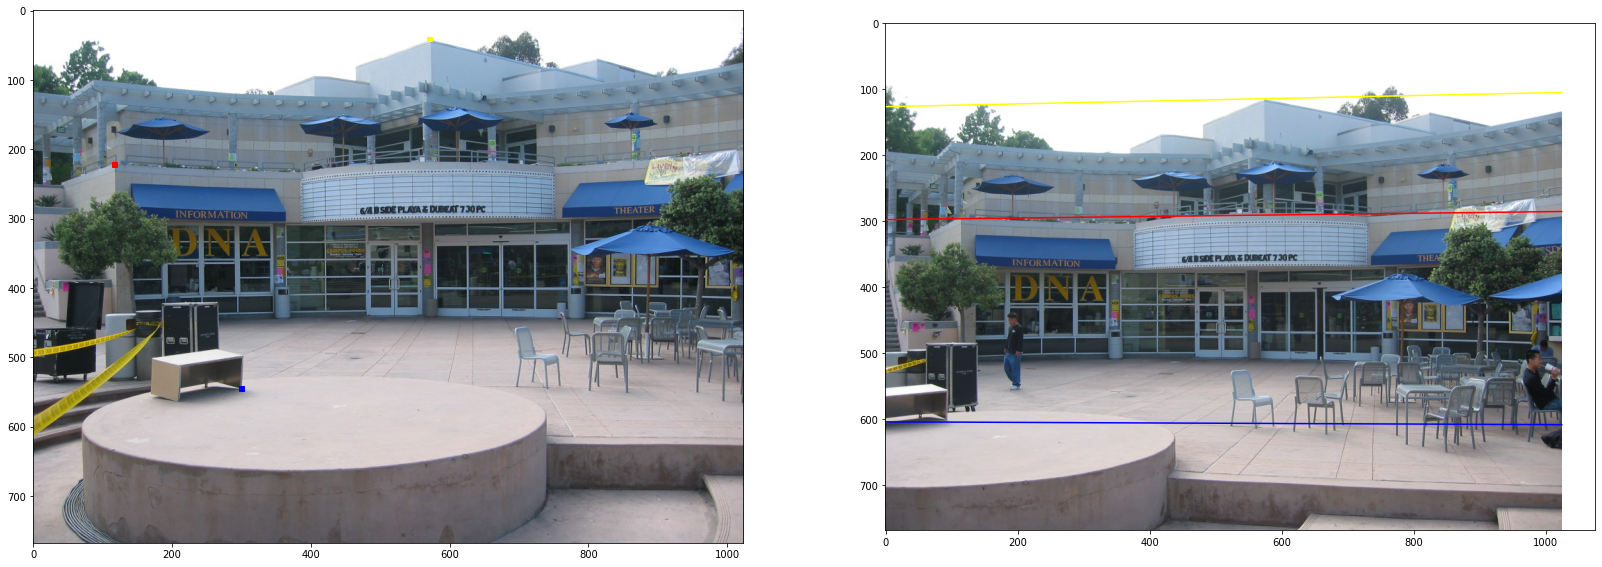

In [ ]:
# Store your three points in image 1 in variable xchosen1
# Store the corresponding epipolar lines in variable epi_lines

# You can modify the code to display the figures, to highlight the corresponding point in image 2.
#    You will have to find the pixel co-ordinates of the 
#    corresponding point in image 2 manually, as we are explicitly choosing outliers(find the real matching point
#    and not the one your code outputs). The epipolar lines should
#    pass close by or through these points.
# 

"""your code here"""
xchosen1 = np.array([[117,300,571],[222,545,41]])
# display the figures
plt.figure(figsize=(28,16))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)
im_height, im_width = I1.shape[:2]
x_ax = np.linspace(0, im_width, im_width*10)
colors = ['red', 'blue', 'yellow']
for i in range(xchosen1.shape[1]):
    e_line = F_LM @ Homogenize(xchosen1[:,i:i+1])
    a, b, c = e_line
    xx, yy = [], []
    for xval in x_ax:
        yval = -(a/b)*xval - c/b
        if yval > 0 and yval < im_width:
            xx.append(xval)
            yy.append(yval)
    x1,y1 = xchosen1[:,i]
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, fill=True, color=colors[i]))
    ax2.plot(xx,yy,'-r', color=colors[i])
plt.show()

"""Comment on your results here."""

In [ ]:
#from the result above, we are confident that the F_LM is robust.